$\textbf{PROGRAMMING ASSIGNMENT - LECTURE 5 - Logistic Regression}$
---

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Attribute Information:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators: <br>
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. <br>
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. <br>
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. <br>
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [103]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import plasma

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

In [104]:
file_path = 'Datasets/heart+disease/processed.cleveland.data'

headers = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=headers)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


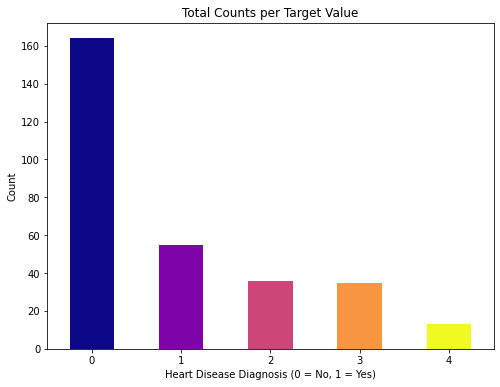

In [105]:
normalize = Normalize(vmin=df['num'].min(), vmax=df['num'].max())
colors = [plasma(normalize(value)) for value in df['num'].value_counts().sort_index().index]

plt.figure(figsize=(8, 6))
df['num'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.xlabel('Heart Disease Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Total Counts per Target Value')
plt.xticks(rotation=0)
plt.show()

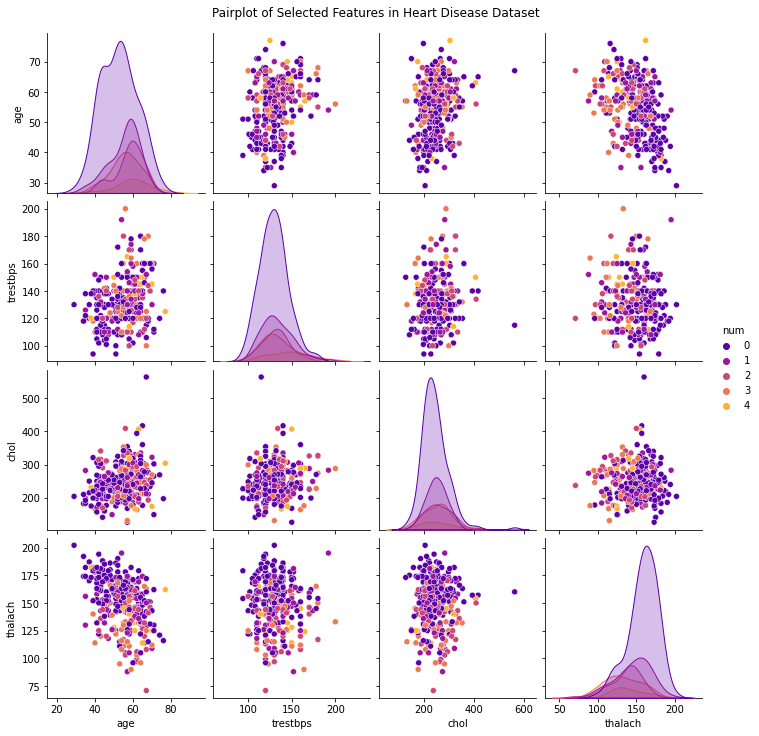

In [106]:
import warnings
warnings.filterwarnings('ignore')

df.replace([np.inf, -np.inf], np.nan, inplace=True)
columns_of_interest = ['age', 'trestbps', 'chol', 'thalach', 'num']
df_selected = df[columns_of_interest]
df_selected.dropna(inplace=True)

num_classes = df_selected['num'].nunique()
palette = sns.color_palette("plasma", num_classes)

sns.pairplot(df_selected, hue='num', palette=palette, diag_kind='kde')
plt.suptitle('Pairplot of Selected Features in Heart Disease Dataset', y=1.02)
plt.show()

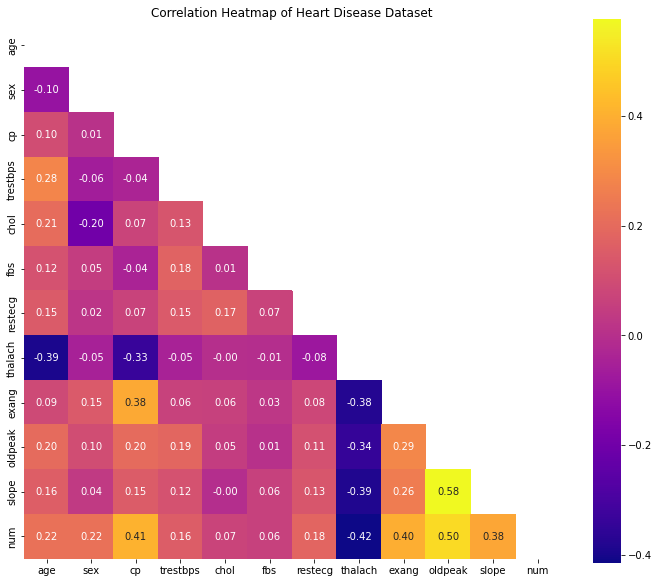

In [107]:
df.dropna(inplace=True)
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='plasma', cbar=True, square=True, mask=mask)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

In [108]:
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)

X = df.drop(columns=['num']) 
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X.columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.618445,-1.467599,0.889907,1.040789,0.259116,-0.419797,1.024744,0.308801,-0.681385,1.329234,0.649577,1.395678,1.151773
1,1.286551,0.681385,0.889907,-0.665455,1.162518,-0.419797,1.024744,0.036803,-0.681385,-0.546248,0.649577,-0.716498,-0.909484
2,-0.495066,-1.467599,-1.178136,-0.665455,-0.028330,-0.419797,-0.989650,0.535467,-0.681385,0.050496,-0.957566,-0.716498,-0.909484
3,1.843306,-1.467599,-0.144114,-1.234203,0.402839,2.382104,1.024744,-0.915190,-0.681385,-0.887245,-0.957566,0.339590,-0.909484
4,0.395742,0.681385,-1.178136,-0.665455,0.792944,-0.419797,1.024744,0.444800,-0.681385,0.647240,0.649577,-0.716498,-0.909484


In [109]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

lr_model_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000)
lr_model_cv.fit(X_train_scaled, y_train)
print("Optimal C value found using LogisticRegressionCV:", lr_model_cv.C_[0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = lr_model_cv.predict(X_test_scaled)

coefficients = lr_model_cv.coef_[0]

print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Model Coefficients:
age: -0.060555927102772675
sex: -0.4230856900390762
cp: -0.6423804798198617
trestbps: -0.36755279607367075
chol: -0.13893552963689948
fbs: 0.20374277093697882
restecg: -0.26863092240519076
thalach: 0.4373801064506043
exang: -0.24173345410175687
oldpeak: -0.3184294844498213
slope: -0.3077035917989013
ca: -0.8852137623776356
thal: -0.6042592090062029


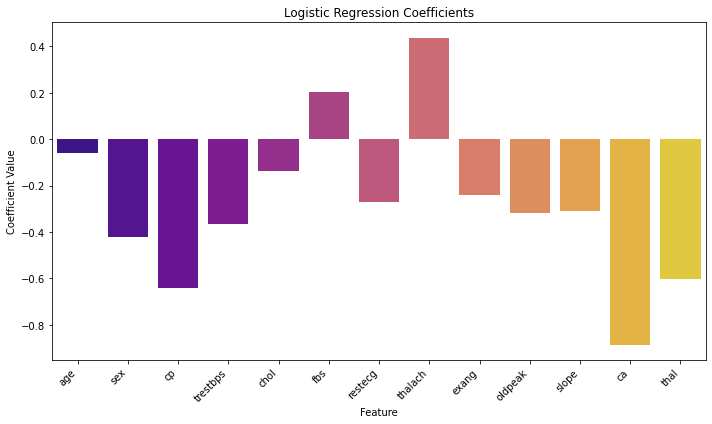

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients, palette='plasma')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

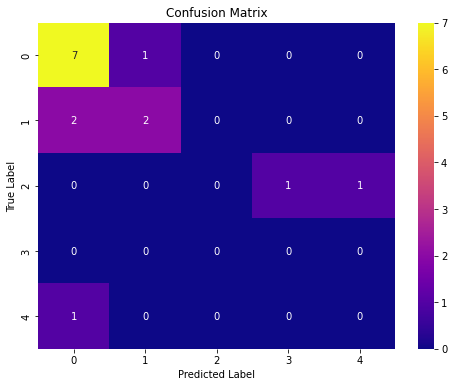

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()